Spatial and pie chart plot of TERI inventory emissions by sector , for NCR and NCT region.

In [1]:
import xarray as xr
import numpy as np       
import warnings
warnings.filterwarnings('ignore')
import salem
import pandas as pd
shpNCR='/exports/csce/datastore/geos/users/s1878599/phd_work/DelhiNCT/gadm_data/NCR/NCR.shp'
shpNCT='/exports/csce/datastore/geos/users/s1878599/phd_work/DelhiNCT/gadm_data/delhiNCT/delhiNCT.shp'

from matplotlib import pyplot as plt, animation
%matplotlib inline

# This is needed to display graphics calculated outside of jupyter notebook
from IPython.display import HTML, display

# Load data and group sectors

In [2]:
direc='../TERI_inventory/processed/yearly_tot/'

In [3]:
species=['NOx','CO','SO2','PM10','NMVOC']
sectors=['T_TOT','I_TOT','D_TOT','P_TOT','O_TOT','N_TOT']

In [4]:
d={}
for sp in species:
    ds=xr.open_dataset(('../../anthroemiss_inventories/TERI_inventory/processed/yearly_tot/tot_emi_2016_'+sp+'.nc'))
    ds['IPO_TOT']=ds['I_TOT']+ds['P_TOT']+ds['O_TOT']
    d.update({sp:ds})

## Get NCR and NCT emissions trhough admin boundaries masks

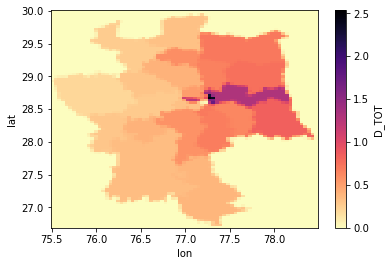

In [5]:
d['CO'].D_TOT.plot(cmap='magma_r')

In [6]:
#MASK: create a sample dataset
data ={"co" : (["lat","lon"], d['CO'].D_TOT.values[:,:])}
coords={'lat': (['lat'], ds.lat[:]), 'lon': (['lon'], ds.lon[:])}
ds_new = xr.Dataset(data, coords=coords)

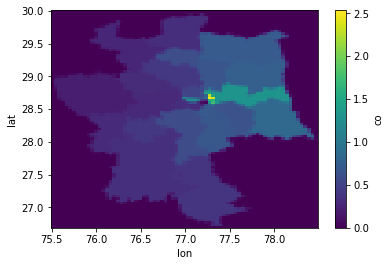

In [7]:
ds_new.co.plot()

In [8]:
# create mask for NCT 
ds_new.co.values=np.ones(ds_new.co.shape)
c=ds_new.salem.roi(shape=shpNCT)  # get only delhi NCT.
c=c.reset_index(['lat','lon'],drop=True) # reset indexes to be the same as emi files.
np.nan_to_num(c.co.values, copy=False, nan=0.0, posinf=0.0, neginf=0.0)
m=c.co[:,:]

#create mask reverse
ds_new.co.values=np.zeros(ds_new.co.shape)
t_r=ds_new.salem.roi(shape=shpNCT)  
t_r=t_r.reset_index(['lat','lon'],drop=True) # reset indexes to be the same as emi files.
np.nan_to_num(t_r.co.values, copy=False, nan=1.00, posinf=0.0, neginf=0.0)
m_r=t_r.co[:,:]

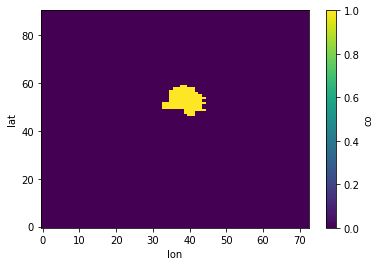

In [9]:
m.plot()

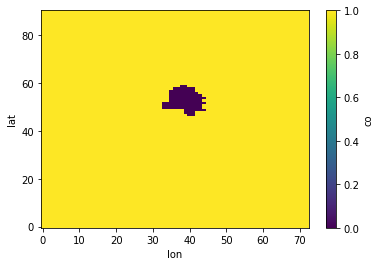

In [10]:
m_r.plot()

In [11]:
sectors=['T_TOT','IPO_TOT','D_TOT']
for k,ds in d.items():
    ds['IPO_TOT']=ds['I_TOT']+ds['P_TOT']+ds['O_TOT']
    ds_nct=ds.salem.roi(shape=shpNCT)
    for sec in sectors:
        ds[sec+'_NCT']=ds_nct[sec].fillna(0)
        ds[sec+'_NCR_ALL']=ds[sec]
        ds[sec+'_NCR']=ds[sec]*m_r

In [12]:
d.keys()

dict_keys(['NOx', 'CO', 'SO2', 'PM10', 'NMVOC'])

In [13]:
# test masks

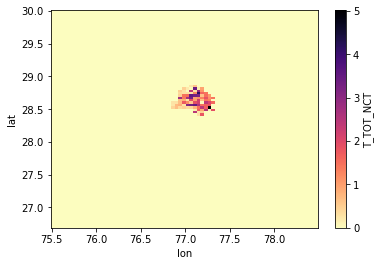

In [14]:
d['NOx'].T_TOT_NCT.plot(cmap='magma_r')

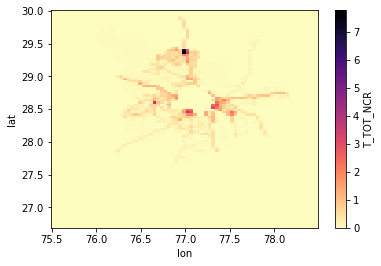

In [15]:
d['NOx'].T_TOT_NCR.plot(cmap='magma_r')

In [16]:
(d['NOx'].IPO_TOT_NCT+d['NOx'].IPO_TOT_NCR).sum(['lat','lon']).values

array(278.51618327)

In [17]:
d['NOx'].T_TOT_NCR_ALL.sum(['lat','lon']).values

array(529.1127354)

In [18]:
d['NOx'].T_TOT.sum(['lat','lon']).values

array(529.1127354)

## Plots

In [19]:
# Main sectors

NOx
CO
SO2
PM10
NMVOC


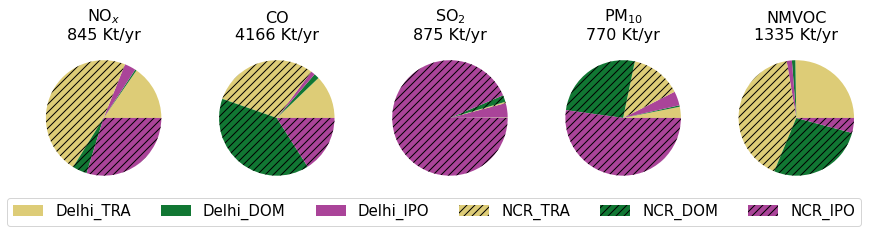

In [20]:
sectors=['T_TOT_NCT','D_TOT_NCT','IPO_TOT_NCT','T_TOT_NCR','D_TOT_NCR','IPO_TOT_NCR']
sectors2=['Delhi_TRA','Delhi_DOM','Delhi_IPO','NCR_TRA','NCR_DOM','NCR_IPO']
spmap={'NOx':'NO$_x$','CO':'CO','SO2':'SO$_2$','PM10':'PM$_{10}$','NMVOC':'NMVOC'}

colorsNCT=['#DDCC77','#117733','#AA4499']
#colorsNCT=["#E69F00","#56B4E9","#009E73"] 
#colorsNCR= ["#999999", "#0072B2", "#CC79A7"] 
colorsNCR=colorsNCT

fig, axes = plt.subplots(1,5,figsize=(15,10))
for sp,ax in zip(d.keys(),fig.axes):
    print(sp)    
    data=[d[sp][sec].sum(['lat','lon']).values for sec in sectors]
    wedges, texts= ax.pie(data,colors=colorsNCT+colorsNCR) #,autopct='%1.f%%')  autotexts 
                                 ## textprops=dict(color="w",fontsize=16)
    ax.set_title(spmap[sp]+'\n'+str(int(sum(data))) + ' Kt/yr',fontsize=16)

    
    for w in wedges[3:6]:
        w.set_hatch('///')
        w.set_linewidth(1)
    
    for w in wedges:
        #w.set_edgecolor('black')
        w.set_linewidth(1)
        #w.set_facecolor('white')

        
    if sp=='NMVOC':
        ax.legend(wedges, sectors2,
          title="",
          loc="top ri2ht",
          fontsize =15,
          ncol=6,
          bbox_to_anchor=(1,0,0, 0))

       # fig.delaxes(axes[2,1]) #delate last axes
fig.tight_layout()
fig.show()

In [21]:
wedges[0:2]

In [22]:
fig.savefig('./fig2a.png', format='png', box_inches="tight",dpi=300)

In [23]:
# transport subsectors

In [24]:
import pandas as pd
da=pd.read_excel('../../anthroemiss_inventories/TERI_inventory/speciation&time/transport_subsectors_share.xlsx',sheet_name='data')

In [25]:
tr=['2w3w','ldv','hdv','dust']
tr2=['2w3w_NCT','ldv_NCT','hdv_NCT','dust_NCT','2w3w_NCR','ldv_NCR','hdv_NCR','dust_NCR']
tr3=['2 and 3 wheelers Delhi','light duty vehicles Delhi','heavy duty vehicles Delhi','resuspended dust Delhi',
     '2 and 3 wheelers NCR','light duty vehicles NCR','heavy duty vehicles NCR','resuspended dust NCR'
    ]

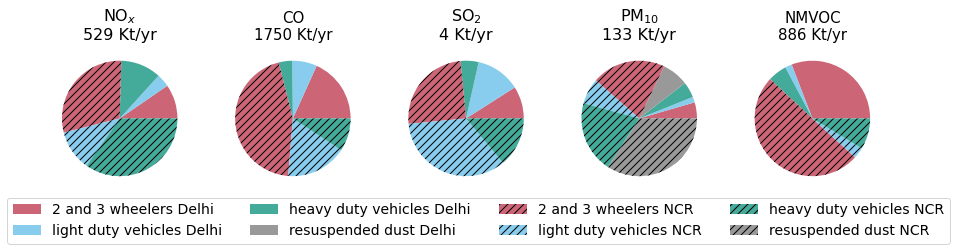

In [26]:
#labels=['Delhi_TRL','Delhi_TRW','Delhi_TRH','Delhi_DST','NCR_TRL','NCR_TRW','NCR_TRH','NCR_DST']

colors=['#CC6677','#88CCEE','#44AA99',"#999999",'#CC6677','#88CCEE','#44AA99',"#999999"]
#colors=['#117733','#332288','#44AA99','#88CCEE','#CC6677','#DDCC77','#AA4499','#882255']

fig, axes = plt.subplots(1,5,figsize=(15,10))
for sp,ax in zip(d.keys(),fig.axes):
    ds=d[sp]

    #share of subsector.    
    data=[(ds['T_TOT_NCT']*(0.01*da.loc[da['subsector']==s,sp].iloc[0])).sum(['lat','lon']).values for s in tr]+\
         [(ds['T_TOT_NCR']*(0.01*da.loc[da['subsector']==s,sp].iloc[0])).sum(['lat','lon']).values for s in tr]
    
    
    wedges, texts = ax.pie(data,colors=colors)
                                 # textprops=dict(color="black",size=10))
    ax.set_title(sp+'\n'+str(int(sum(data))) + ' Kt/yr',fontsize=15)
    
    if sp=='SO2':
        ax.set_title('SO${_2}$'+'\n'+str(int(sum(data))) + ' Kt/yr',fontsize=16)
    
    if sp=='PM10':
        ax.set_title('PM$_{10}$'+'\n'+str(int(sum(data))) + ' Kt/yr',fontsize=16)
    
    if sp=='NOx':
        ax.set_title('NO${_x}$'+'\n'+str(int(sum(data))) + ' Kt/yr',fontsize=16)    
    
        
    for w in wedges[4:8]:
        w.set_hatch('///')
        w.set_linewidth(1)
    
    for w in wedges:
        #w.set_edgecolor('black')
        w.set_linewidth(1)
        #w.set_facecolor('white')

    if sp=='NMVOC':
        ax.legend(wedges, tr3,
          title='',
          loc="bottom left",
          ncol=4,
          fontsize=14,
          bbox_to_anchor=(1.5, 0,0, 0))
        #fig.delaxes(axes[1,2]) #delate last axes
fig.tight_layout()
fig.show()

In [27]:
fig.savefig('./fig2b.png', format='png', box_inches="tight",dpi=300)

In [28]:
# spatial plot

In [29]:
# DEFINE PLOT FUNCTION

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.colorbar import colorbar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader

def var_plot_2D(dataset, var_name,title,cmapv):
    
    var = dataset[var_name]
    
    #draw map
    ax = plt.subplot(projection=ccrs.PlateCarree())
    
    # draw coastlines and borders
    ax.add_feature(cfeature.COASTLINE,lw=0.75)
    ax.add_feature(cfeature.BORDERS, lw=0.75)
    
    
    # Add data from Global Administrative Areas Dataset GDAM https://gadm.org/index.html
    fname = '/exports/csce/datastore/geos/users/s1878599/phd_work/DelhiNCT/gadm_data/NCR/NCR.shp'   

    admin = list(shpreader.Reader(fname).geometries())
            # Add data from Global Administrative Areas Dataset GDAM https://gadm.org/index.html
    ax.add_geometries(admin, ccrs.PlateCarree(),
                      edgecolor='black', facecolor='none', alpha=1, lw=0.5)
    
    fname2 = '/exports/csce/datastore/geos/users/s1878599/phd_work/DelhiNCT/gadm_data/delhiNCT/delhiNCT.shp'   

    admin = list(shpreader.Reader(fname2).geometries())
            # Add data from Global Administrative Areas Dataset GDAM https://gadm.org/index.html
    ax.add_geometries(admin, ccrs.PlateCarree(),
                      edgecolor='red', facecolor='none', alpha=1, lw=2)


 
    #draw meridians and parallels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='k', alpha=0.4, linestyle='-')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 13, 'color': 'gray'}
    gl.ylabel_style = {'size': 13, 'color': 'grey'}
    
    #plot SURFACE data
    long = dataset.lon.values
    lat  = dataset.lat.values
    
   
    var_values = var.values
    #var_values[var_values < 0.05] = np.nan
   
    res = 15 #controls the resolution for the map plotting.
    
    cmap = mpl.cm.get_cmap(cmapv)
    cmap.set_bad(color='White')  # set masked values white.  
    cmap.set_under("w")
    cs= plt.pcolor(long, lat, var_values,cmap=cmap,vmin=0.2,vmax=2.5)
   
    #colorbar
    cbar = plt.colorbar(cs, pad=0.02,format='%.f',extend='both')
    cbar.set_label('CO Kt/yr',fontsize=13)
    #cbar.set_ticks([0.2,5,10,15,20,25])
    ax.set_title(title,fontsize=15)
    
    #plotting parameters
    plt.rcParams['figure.figsize'] = [10, 5]
    #plt.rc('text', usetex=True)
    #plt.savefig('./fig2cc.png', format='png', box_inches="tight",dpi=300)

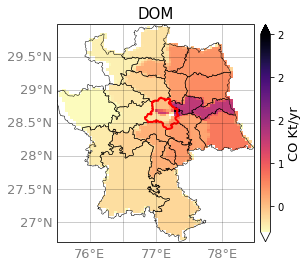

In [30]:
var_plot_2D(d['CO'].salem.roi(shape=shpNCR),'D_TOT','DOM','magma_r')